### Linear Regression (New)

In [1]:
import torch
from torch import nn

import pandas as pd
import matplotlib.pyplot as plt

##### 데이터 임의 생성 저장 소스

In [2]:
# x = torch.arange(1, 11, dtype=torch.float).unsqueeze(dim=1)
# y = x / 2 + 1 + torch.randn(10).unsqueeze(dim=1) / 5

# data = torch.cat((x, y), dim=1)
# data = pd.DataFrame(data.numpy())

# data.to_csv('lr.csv', header=['x', 'y'])

### 데이터 로드

In [3]:
data = pd.read_csv('lr.csv')

### 변환과정 단계 별 확인

In [4]:
data['x'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [5]:
torch.from_numpy(data['x'].values)

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=torch.float64)

In [6]:
torch.from_numpy(data['x'].values).unsqueeze(dim=1)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]], dtype=torch.float64)

In [7]:
torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])

### 데이터 시각화 확인

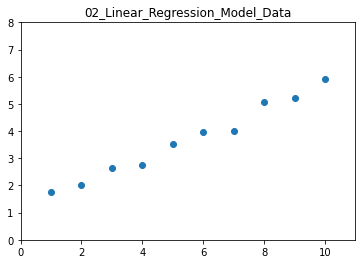

In [8]:
# Avoid copy data, just refer
# 데이터를 복사하여 새로 텐서를 생성하는 대신 
# 원 데이터와 메모리를 공유하는 텐서를 쓰기 위함
x = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()
y = torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()

plt.xlim(0, 11);    plt.ylim(0, 8)
plt.title('02_Linear_Regression_Model_Data')
plt.scatter(x, y)

plt.show()

In [9]:
from torch import nn

model = nn.Linear(in_features=1, out_features=1, bias=True)
print(model)
print(model.weight)
print(model.bias)

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[0.8181]], requires_grad=True)
Parameter containing:
tensor([0.3258], requires_grad=True)


In [10]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [11]:
print(model(x))

tensor([[1.1439],
        [1.9620],
        [2.7800],
        [3.5981],
        [4.4161],
        [5.2342],
        [6.0522],
        [6.8703],
        [7.6884],
        [8.5064]], grad_fn=<AddmmBackward>)


In [12]:
for step in range(500):
    pred = model(x)
    loss = criterion(pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if step % 50 == 0:
        print("loss : ", loss)
        pass

loss :  tensor(2.3766, grad_fn=<MseLossBackward>)
loss :  tensor(0.2217, grad_fn=<MseLossBackward>)
loss :  tensor(0.1440, grad_fn=<MseLossBackward>)
loss :  tensor(0.0902, grad_fn=<MseLossBackward>)
loss :  tensor(0.0584, grad_fn=<MseLossBackward>)
loss :  tensor(0.0422, grad_fn=<MseLossBackward>)
loss :  tensor(0.0350, grad_fn=<MseLossBackward>)
loss :  tensor(0.0321, grad_fn=<MseLossBackward>)
loss :  tensor(0.0312, grad_fn=<MseLossBackward>)
loss :  tensor(0.0309, grad_fn=<MseLossBackward>)


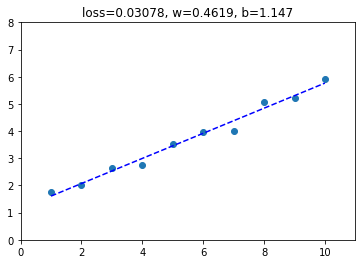

In [13]:
def display_results(model, x, y):
    prediction = model(x)
    loss = criterion(input=prediction, target=y)
    
    plt.clf()
    plt.xlim(0, 11);    plt.ylim(0, 8)
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'b--')
    plt.title('loss={:.4}, w={:.4}, b={:.4}'.format(loss.data.item(), model.weight.data.item(), model.bias.data.item()))
    plt.show()
    
display_results(model, x, y)    

In [14]:
torch.save(obj=model, f='02_Linear_Regression_Model.pt')

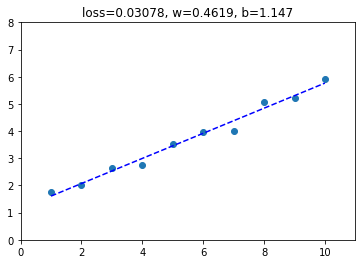

In [15]:
loaded_model = torch.load(f='02_Linear_Regression_Model.pt')

display_results(loaded_model, x, y)